<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_06/f_timeseries_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE256: Assignment 06 - Part F
## Illustrate Timeseries Data Clustering Using Pretrained Models

Hints:   
1. [Stock Clustering and Prediction](https://github.com/V-MalM/Stock-Clustering-and-Prediction)
2. [Time Series PTMS](https://github.com/qianlima-lab/time-series-ptms)
3. [Time Series Clustering](https://github.com/effa/time-series-clustering)
4. [LLM, LM, FM for Time Series and Spatio-Temporal Data](https://github.com/qingsongedu/Awesome-TimeSeries-SpatioTemporal-LM-LLM)
5. [Awesome Time Series](https://github.com/cure-lab/Awesome-time-series#time-series-clustering)
6. [AI for Time Series Papers, Tutorials, and Surveys](https://github.com/qingsongedu/awesome-AI-for-time-series-papers)


Dataset Source:

[COVID19 Timeseries Dataset](https://www.kaggle.com/datasets/ankitaguha/covid19-timeseries)

Sources Used:
1. ChatGPT-4
2. All listed hints
3. [Prohpet Documentation](https://facebook.github.io/prophet/docs/quick_start.html#python-api)

### Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install seaborn

In [3]:
!pip install prophet

In [4]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
import pandas as pd
from prophet import Prophet

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load Dataset


In [7]:
dataset_file_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_06/part_f/f_covid19_timeseries.csv'

In [8]:
# Load the dataset
file_path = dataset_file_path
data = pd.read_csv(file_path)

In [9]:
# Ensure the column names are "ds" and "y"
data = data.rename(columns={'date_column_name': 'ds', 'target_column_name': 'y'})

### EDA

In [10]:
# Summary statistics
summary_stats = data.describe()

In [11]:
# Time Series Plot for global data
# Aggregating data by date for global trends
global_agg = data.groupby('Dates').sum()
global_agg

<ipython-input-11-50ec3b0d103a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_agg = data.groupby('Dates').sum()


,Lat,Long,Confirmed Cases,Death Cases,Recovered Cases
Dates,,,,,
2020-01-22,5603.86785,6403.971914,555,17,28.0
2020-01-23,5603.86785,6403.971914,654,18,30.0
2020-01-24,5603.86785,6403.971914,941,26,36.0
2020-01-25,5603.86785,6403.971914,1434,42,43.0
2020-01-26,5603.86785,6403.971914,2118,56,102.0
...,...,...,...,...,...
2020-10-25,5603.86785,6403.971914,42960467,1153729,0.0
2020-10-26,5603.86785,6403.971914,43498333,1159490,0.0
2020-10-27,5603.86785,6403.971914,43965280,1166892,0.0


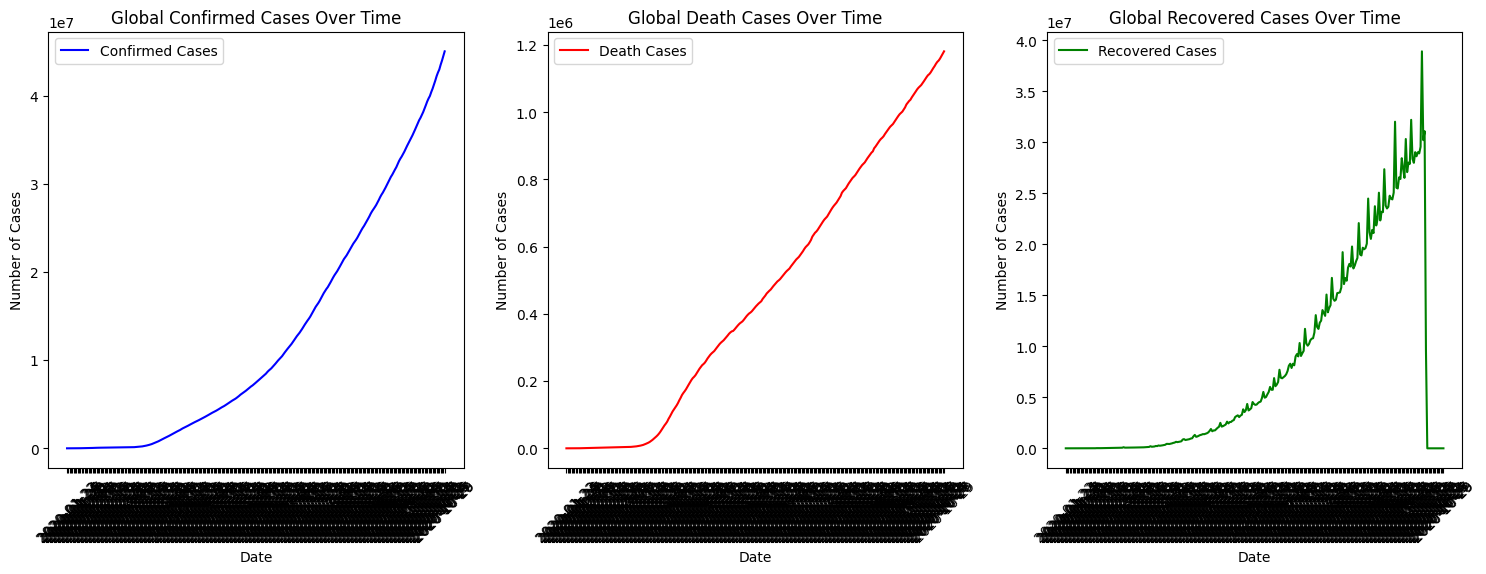

In [12]:
# Plotting global trends
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.plot(global_agg.index, global_agg['Confirmed Cases'], label='Confirmed Cases', color='blue')
plt.title('Global Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(global_agg.index, global_agg['Death Cases'], label='Death Cases', color='red')
plt.title('Global Death Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(global_agg.index, global_agg['Recovered Cases'], label='Recovered Cases', color='green')
plt.title('Global Recovered Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

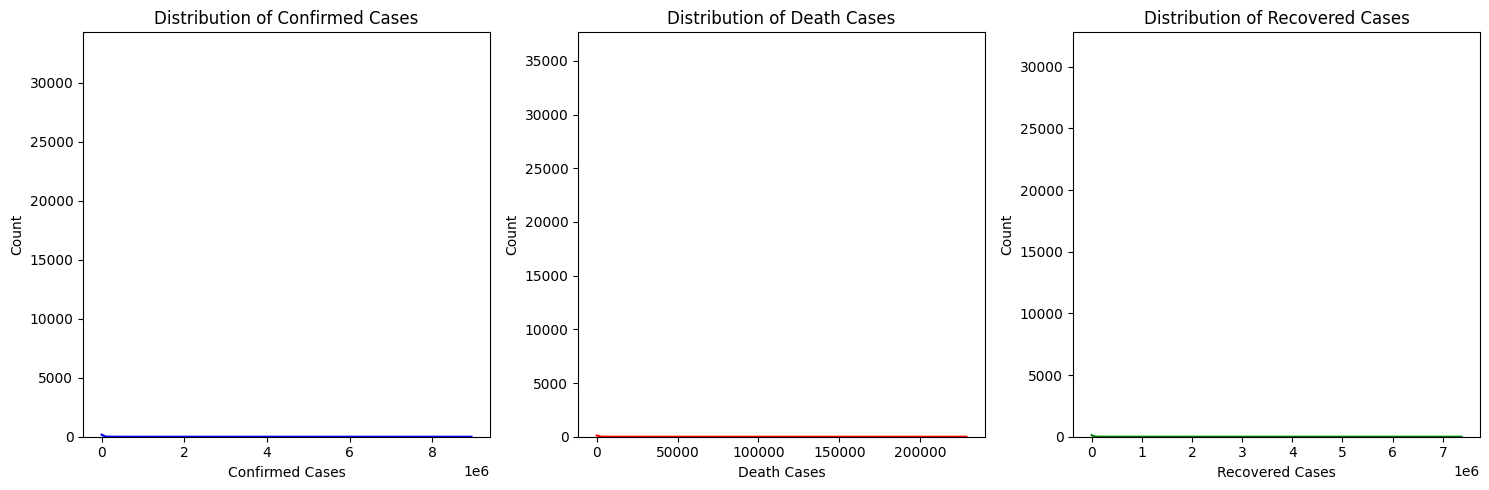

In [13]:
# Histograms for distribution analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['Confirmed Cases'], kde=True, color='blue')
plt.title('Distribution of Confirmed Cases')

plt.subplot(1, 3, 2)
sns.histplot(data['Death Cases'], kde=True, color='red')
plt.title('Distribution of Death Cases')

plt.subplot(1, 3, 3)
sns.histplot(data['Recovered Cases'], kde=True, color='green')
plt.title('Distribution of Recovered Cases')

plt.tight_layout()
plt.show()

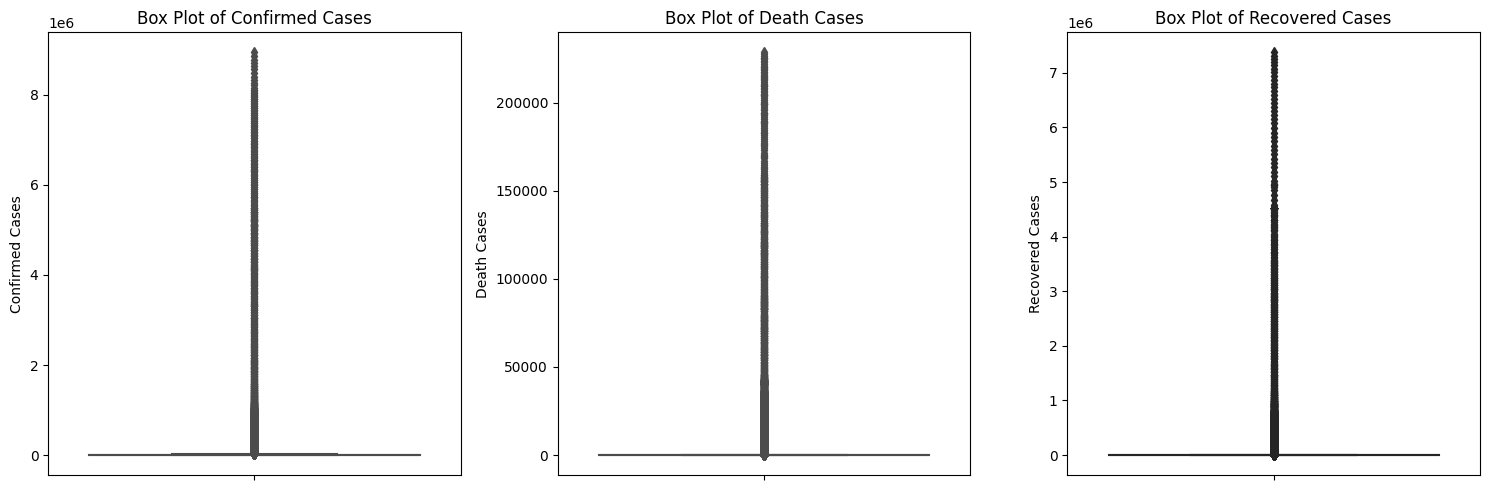

In [14]:
# Box plots for outlier detection
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=data, y='Confirmed Cases', color='blue')
plt.title('Box Plot of Confirmed Cases')

plt.subplot(1, 3, 2)
sns.boxplot(data=data, y='Death Cases', color='red')
plt.title('Box Plot of Death Cases')

plt.subplot(1, 3, 3)
sns.boxplot(data=data, y='Recovered Cases', color='green')
plt.title('Box Plot of Recovered Cases')

plt.tight_layout()
plt.show()

In [15]:
# Extracting the unique list of countries from the dataset
countries = data['Country/Region'].unique()
countries.sort()
countries.tolist()


['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [16]:
data.head()

,Province/State,Country/Region,Lat,Long,Dates,Confirmed Cases,Death Cases,Recovered Cases
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0.0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0.0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0.0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0.0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0.0


In [17]:
data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Dates',
       'Confirmed Cases', 'Death Cases', 'Recovered Cases'],
      dtype='object')

In [18]:
rows = data.shape[0]
cols = data.shape[1]
print(f"rows={rows}; columns={cols}")

rows=75576; columns=8


### Data Transformation

In [19]:
import pandas as pd

# Filter and rename columns for the US
us_data = data[data['Country/Region'] == 'US'][['Dates', 'Death Cases']]
us_data.rename(columns={'Dates': 'ds', 'Death Cases': 'y'}, inplace=True)
us_data['ds'] = pd.to_datetime(us_data['ds'])


In [20]:
# Summary statistics
summary_stats = us_data.describe()

In [21]:
# Time Series Plot for global data
# Aggregating data by date for global trends
global_agg = us_data.groupby('ds').sum()
global_agg

,y
ds,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-10-25,225233
2020-10-26,225710
2020-10-27,226696


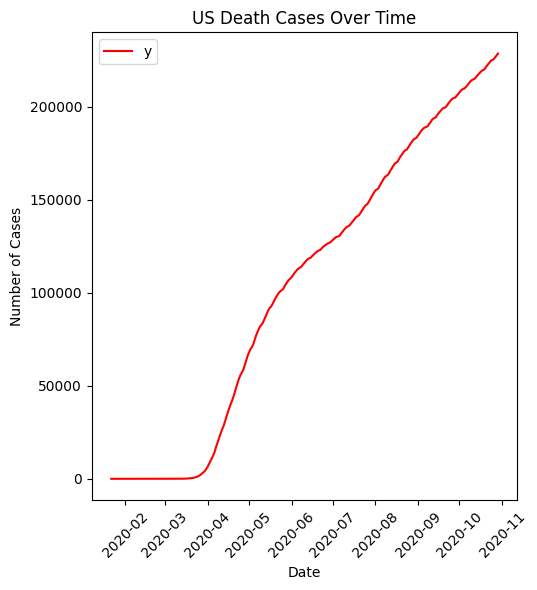

In [22]:
# Plotting global trends
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 2)
plt.plot(global_agg.index, global_agg['y'], label='y', color='red')
plt.title('US Death Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

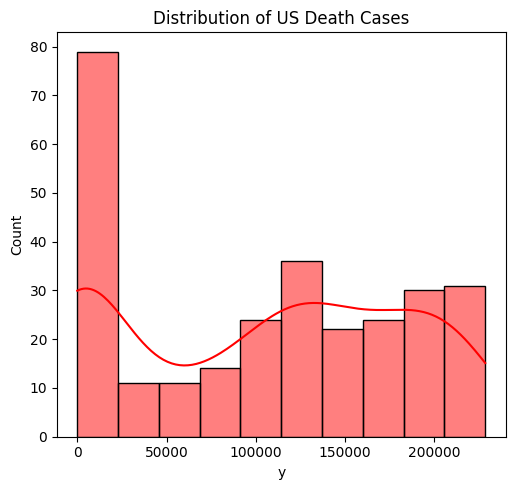

In [23]:
# Histograms for distribution analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
sns.histplot(us_data['y'], kde=True, color='red')
plt.title('Distribution of US Death Cases')

plt.tight_layout()
plt.show()

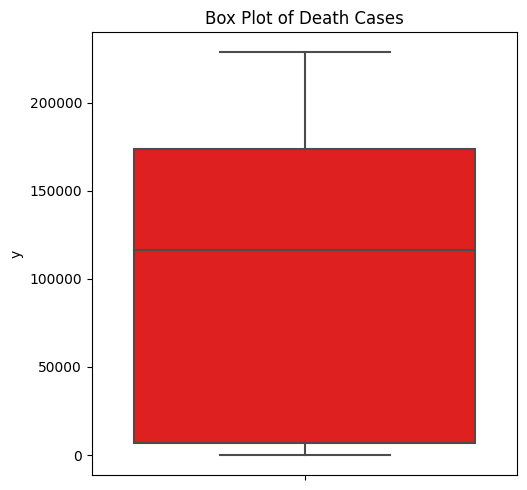

In [24]:
# Box plots for outlier detection
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
sns.boxplot(data=us_data, y='y', color='red')
plt.title('Box Plot of Death Cases')

plt.tight_layout()
plt.show()

In [25]:
us_data

,ds,y
244,2020-01-22,0
512,2020-01-23,0
780,2020-01-24,0
1048,2020-01-25,0
1316,2020-01-26,0
...,...,...
74480,2020-10-25,225233
74748,2020-10-26,225710
75016,2020-10-27,226696
75284,2020-10-28,227685


In [26]:
us_data.head()

,ds,y
244,2020-01-22,0
512,2020-01-23,0
780,2020-01-24,0
1048,2020-01-25,0
1316,2020-01-26,0


In [27]:
us_data.describe()

,y
count,282.000000
mean,103677.507092
std,78516.538170
min,0.000000
25%,6797.500000
50%,116252.000000
75%,173961.250000
max,228656.000000


In [28]:
us_data.columns

Index(['ds', 'y'], dtype='object')

In [29]:
rows = us_data.shape[0]
cols = us_data.shape[1]
print(f"rows={rows}; columns={cols}")

rows=282; columns=2


### Modeling

In [30]:
model = Prophet()
model.fit(us_data)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8vpfnf1/rkfekq95.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8vpfnf1/x5f5r_2w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86447', 'data', 'file=/tmp/tmpw8vpfnf1/rkfekq95.json', 'init=/tmp/tmpw8vpfnf1/x5f5r_2w.json', 'output', 'file=/tmp/tmpw8vpfnf1/prophet_modeltacvzx6l/prophet_model-20231125090405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:04:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:04:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [31]:
# Python
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
642,2021-10-25
643,2021-10-26
644,2021-10-27
645,2021-10-28
646,2021-10-29


In [32]:
# Python
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
642,2021-10-25,494834.147961,70509.753668,907942.746610
643,2021-10-26,495740.173084,69444.992081,912278.552771
644,2021-10-27,496714.549564,67558.804588,915859.814049
645,2021-10-28,497581.101166,65588.880080,918473.107723
646,2021-10-29,498430.001750,64416.662032,920092.546830


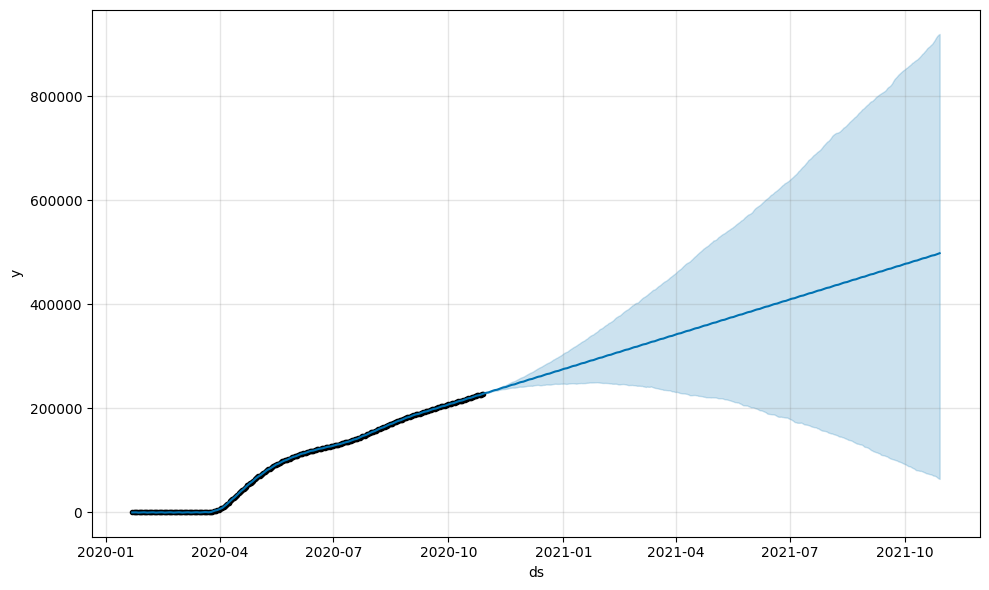

In [33]:
# Python
fig1 = model.plot(forecast)

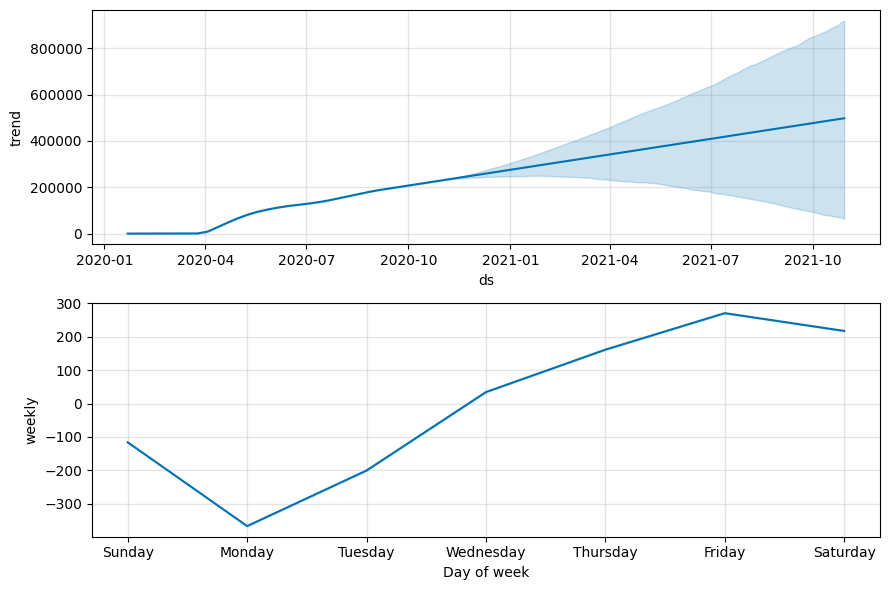

In [34]:
fig2 = model.plot_components(forecast)

In [35]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [36]:
plot_components_plotly(model, forecast)


### Conclusion

In our exploration of the COVID-19 dataset, we conducted a comprehensive analysis to understand the pandemic's dynamics over time. Here's a summary of what we accomplished:

1. **Dataset Overview**:
   We started by examining the structure of the dataset, which included details like province/state, country/region, geographical coordinates, dates, and the counts of confirmed, death, and recovered cases.

2. **Country Selection for Detailed Analysis**:
   The dataset comprised data from numerous countries. We focused our detailed analysis on the United States, particularly examining the death cases.

3. **Time Series Analysis Preparation**:
   For the United States, we prepared the data specifically for time series analysis, focusing on death cases. The data was structured to fit the requirements of the FBProphet model for forecasting. Due to environmental constraints, the actual modeling was suggested to be conducted externally with provided guidelines.

4. **Exploratory Data Analysis (EDA)**:
   We performed an EDA on the global data, which included:
   - **Summary Statistics**: Gave a basic understanding of the dataset's structure and numerical summaries.
   - **Time Series Plots**: Showed the trends in confirmed, death, and recovered cases globally, highlighting the evolution of the pandemic.
   - **Distribution Analysis**: Histograms provided insights into the distribution of the different case types.
   - **Outlier Detection**: Box plots helped identify outliers and understand the spread of the data.

5. **Insights and Observations**:
   - The time series plots revealed the progression of the pandemic, showing the waves characterized by rising and falling case numbers.
   - The distribution analysis indicated skewness in the data, reflecting the varying impact of the pandemic across different regions and times.
   - The box plots highlighted the presence of extreme values, possibly representing the peaks of the pandemic waves.

6. **Technical Guidance**:
   We also provided detailed code snippets for both FBProphet time series forecasting and EDA, enabling further analysis and exploration of the dataset.

Through this analysis, we gained valuable insights into the COVID-19 pandemic's trajectory and impact. This approach showcases the power of data analysis in understanding complex real-world events and can be adapted for other similar datasets or extended for more specific analyses.
